In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 55kB/s 


In [2]:
!nvidia-smi

Mon Sep  7 16:21:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_wine


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = load_wine()

In [5]:
df.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
dir(df)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [7]:
wine = pd.DataFrame(df.data,columns=df.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
wine['target'] = df.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
wine.isnull().sum

<bound method DataFrame.sum of      alcohol  malic_acid    ash  ...  od280/od315_of_diluted_wines  proline  target
0      False       False  False  ...                         False    False   False
1      False       False  False  ...                         False    False   False
2      False       False  False  ...                         False    False   False
3      False       False  False  ...                         False    False   False
4      False       False  False  ...                         False    False   False
..       ...         ...    ...  ...                           ...      ...     ...
173    False       False  False  ...                         False    False   False
174    False       False  False  ...                         False    False   False
175    False       False  False  ...                         False    False   False
176    False       False  False  ...                         False    False   False
177    False       False  False  ...         

In [10]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


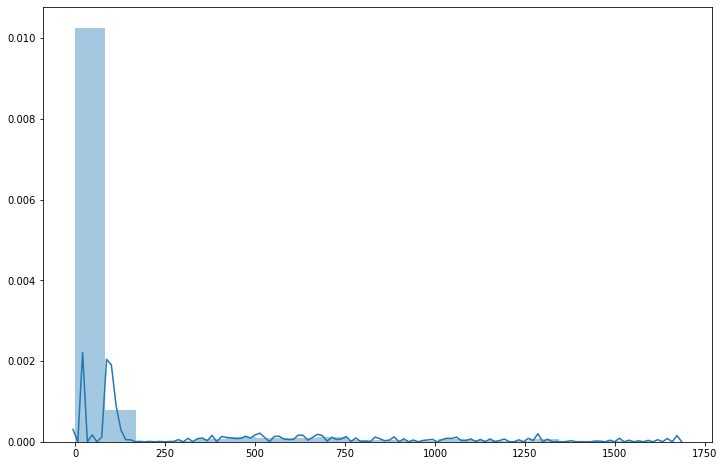

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(wine,bins=20);

In [12]:
import plotly.express as px
fig = px.pie(wine, values='alcohol', names='color_intensity',)
fig.show()

In [13]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
wine.target.unique()

array([0, 1, 2])

In [15]:
wine.shape

(178, 14)

In [16]:
import plotly.express as px
fig = px.pie(wine,values='target',title="Distribution of Target Values",names='target')
fig.show()

print(wine.target.value_counts())

1    71
0    59
2    48
Name: target, dtype: int64


In [17]:
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [18]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [55]:
my_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(56,activation='relu'),
  tf.keras.layers.Dropout(0.30),
  tf.keras.layers.Dense(56,activation='relu'),
  tf.keras.layers.Dropout(0.20),
  tf.keras.layers.Dense(15,activation='softmax'),
])

In [56]:
optimiser = tf.keras.optimizers.Adam()
my_model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [57]:
X_train.shape

(142, 13)

In [58]:
history = my_model.fit(X_train, y_train,validation_split=0.20, epochs=100, batch_size=12)

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 2.7057 - accuracy: 0.0531 - val_loss: 2.5613 - val_accuracy: 0.2759
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 2.4981 - accuracy: 0.2655 - val_loss: 2.3385 - val_accuracy: 0.5862
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2130 - accuracy: 0.4867 - val_loss: 2.0588 - val_accuracy: 0.7241
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.9164 - accuracy: 0.5664 - val_loss: 1.7121 - val_accuracy: 0.8276
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1.5881 - accuracy: 0.5398 - val_loss: 1.3381 - val_accuracy: 0.8966
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1.2371 - accuracy: 0.6460 - val_loss: 1.0313 - val_accuracy: 0.9310
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0347 - accuracy: 0.6726 - val_loss: 0.8368 - val_accuracy: 0.9310
Epoch 8/100


In [59]:
my_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.9722


[0.1788896918296814, 0.9722222089767456]

In [60]:
my_predict = my_model.predict(X_test)
my_predict

array([[9.98424411e-01, 1.52394478e-03, 3.04481855e-05, 3.40286692e-06,
        6.97655537e-07, 7.85622888e-07, 7.81223832e-07, 7.18218871e-07,
        1.65566098e-06, 9.33908154e-07, 2.02802244e-06, 3.82074677e-06,
        6.93607376e-07, 4.29092051e-06, 1.49339610e-06],
       [1.20922698e-04, 7.43188255e-04, 9.99098301e-01, 3.45544072e-06,
        3.30658213e-06, 5.10305199e-06, 1.48147569e-06, 2.34477375e-06,
        6.34809282e-07, 3.78849609e-06, 2.54924089e-06, 8.66238224e-06,
        2.08503138e-06, 2.20576317e-06, 2.02531169e-06],
       [1.35527109e-04, 9.99863386e-01, 2.53514571e-07, 2.94131812e-08,
        5.37059508e-09, 3.82201151e-08, 5.70248702e-08, 1.98212646e-08,
        4.59285694e-08, 1.53949742e-08, 1.24917241e-08, 1.56891833e-08,
        1.02044019e-07, 5.10302868e-07, 2.95569276e-08],
       [9.41765845e-01, 5.78601249e-02, 2.98393628e-04, 9.18417845e-06,
        1.90162245e-06, 3.64330117e-06, 2.90931757e-06, 2.28043723e-06,
        4.85879855e-06, 3.75332115e-0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


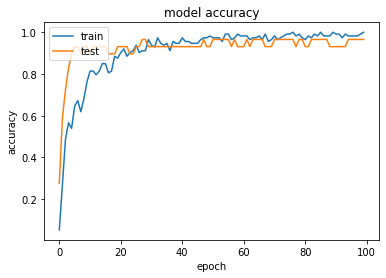

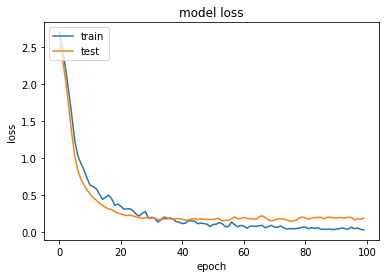

In [65]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
np.round(my_predict)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.